## Patient Initial Stay Duration Predictor using Linear Regression Modeling

Research Question:
  Is it possible to create a linear regression model representing the initial days of stay for a patient using other continuous and categorical variables within the dataset?

Import necessary python packages for data analysis

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msg
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
!pip install prince
from prince import MCA
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

Load dataset

In [43]:
data = pd.read_csv('medical_clean.csv')
data

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,...,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,...,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,...,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,...,7644.483000,7781.678000,5,5,3,4,4,3,4,3


Observe Dataset Characteristics

In [44]:
data.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

Extract Feature Columns of interest and Target Column

In [46]:
continuous = ['Age', 'Income', 'VitD_levels', 'TotalCharge', 'Additional_charges']
categorical =['Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services']
features = continuous + categorical
target = ['Initial_days']
data = data[features + target]

Check for any missing values

Age                   0
Income                0
VitD_levels           0
TotalCharge           0
Additional_charges    0
Marital               0
Gender                0
ReAdmis               0
Soft_drink            0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
dtype: int64


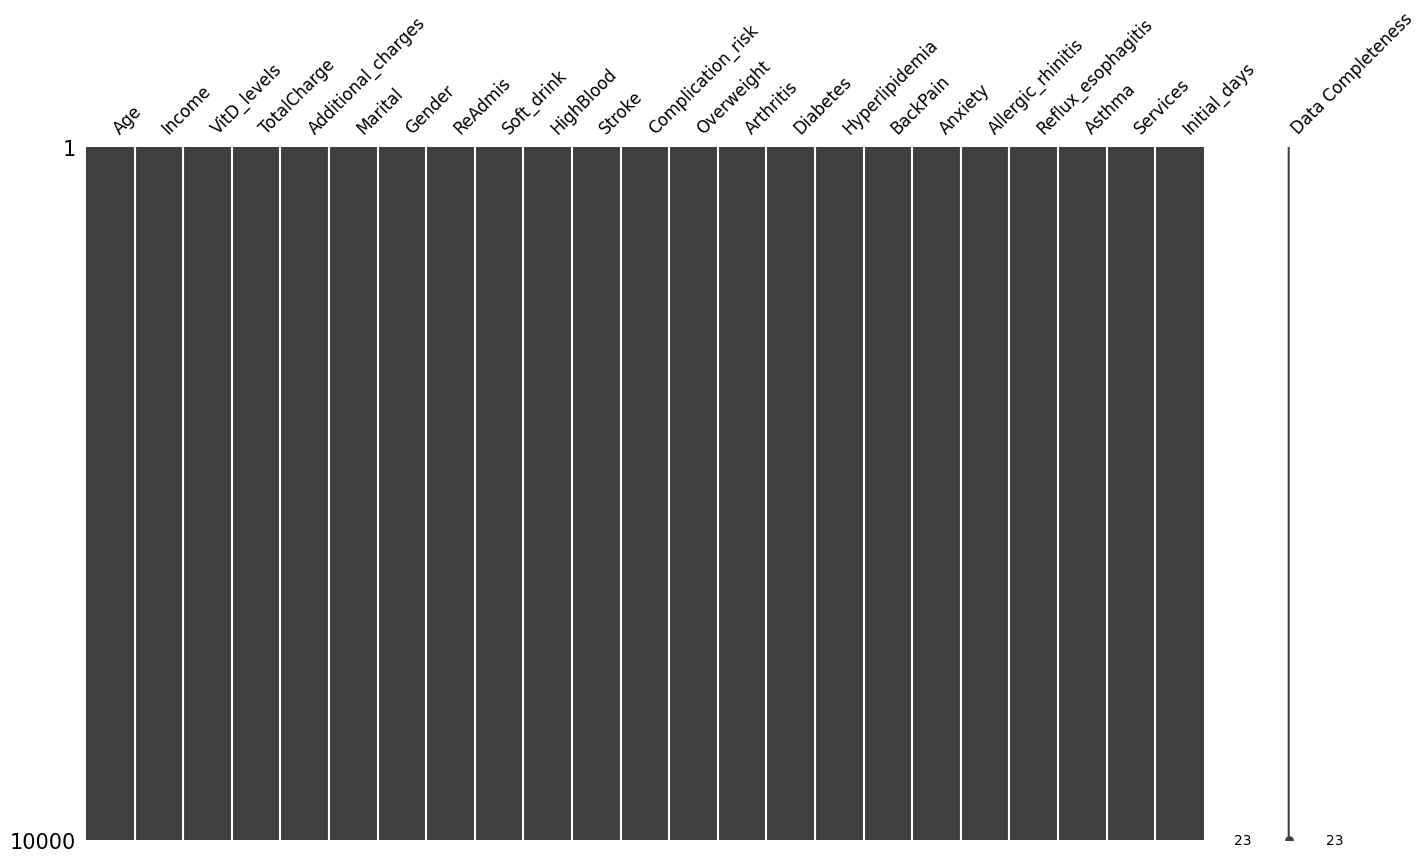

In [47]:
msg.matrix(data, figsize=(16,9), fontsize=12, labels=True)
missing_columns = data.isnull().sum()
print(missing_columns)

#Data Transformation
The goal of the following data transformation process is to ensure that all feature variables undergo feature reduction as well as any extra steps required to prepare the data for such processes.

Principal Component Analysis will be used for feature reduction with the continuous features while Multi Correspondance Analysis wil be used for the categorical features.

While PCA can be applied to the continuous variables right off the bat, the categorical varaibles will have to undergo hot-encoding via pd.get_dummies prior to the application of MCA for feature reduction.

##Continuous Variables

Summary Statistics for Each Variables Used for Analysis and Distribution Visualizations

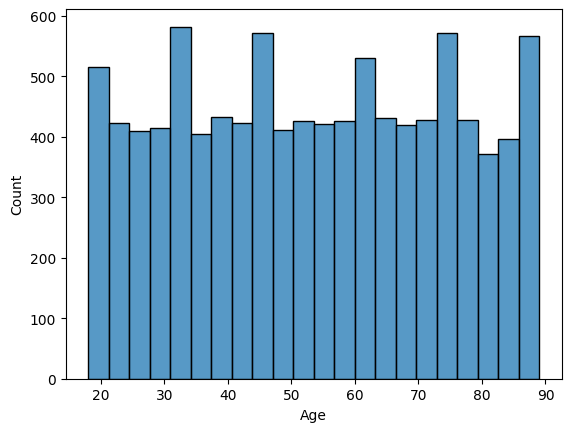

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64


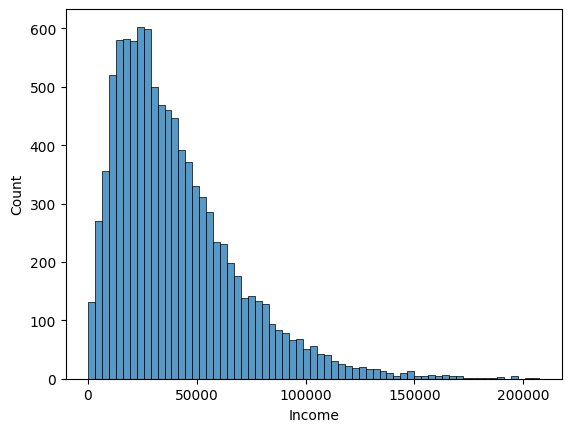

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64


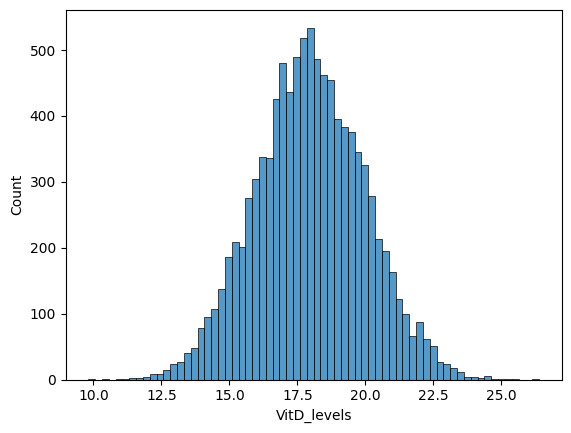

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64


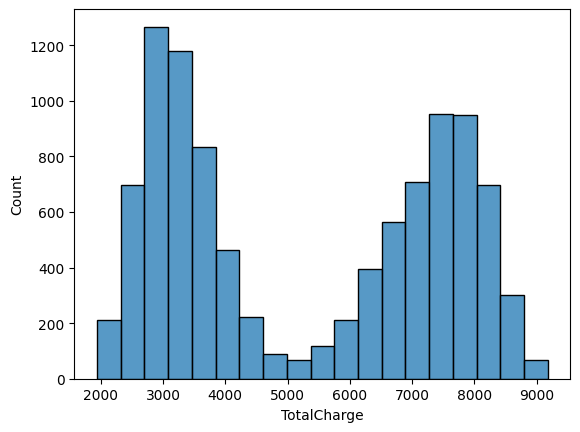

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64


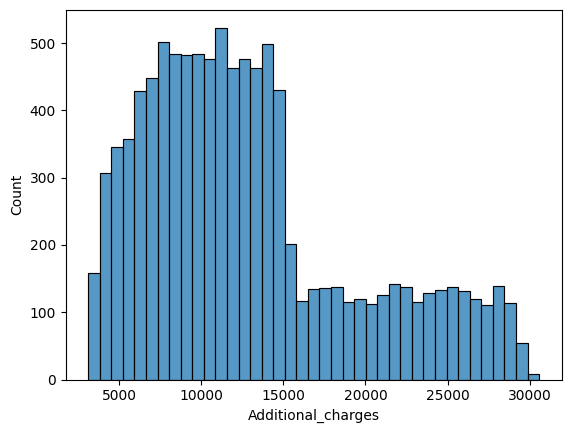

count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64


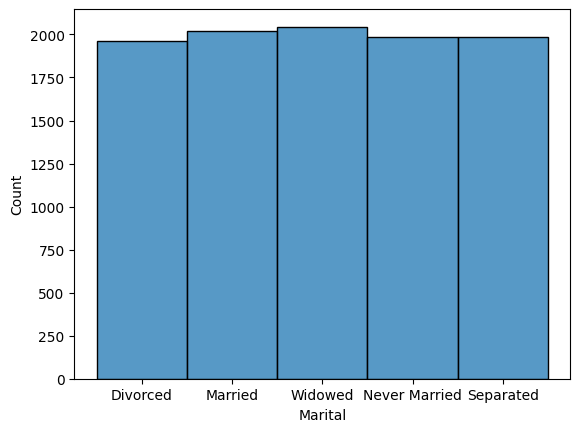

count       10000
unique          5
top       Widowed
freq         2045
Name: Marital, dtype: object


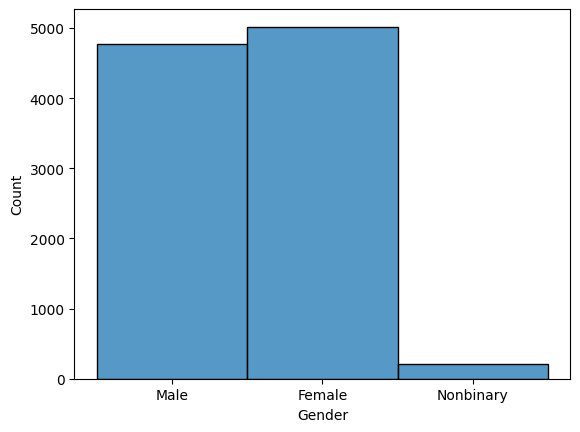

count      10000
unique         3
top       Female
freq        5018
Name: Gender, dtype: object


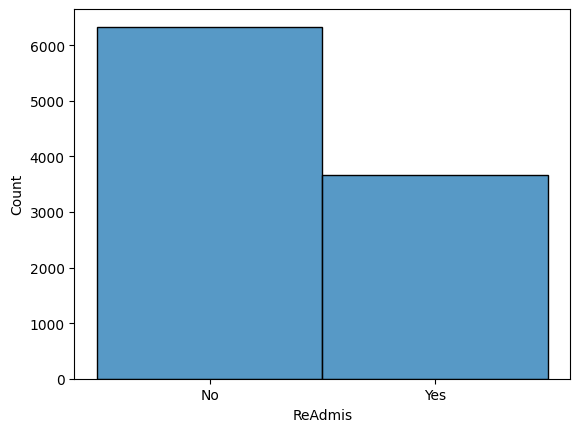

count     10000
unique        2
top          No
freq       6331
Name: ReAdmis, dtype: object


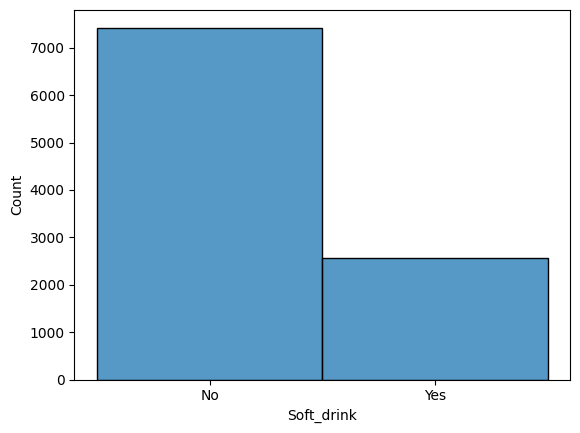

count     10000
unique        2
top          No
freq       7425
Name: Soft_drink, dtype: object


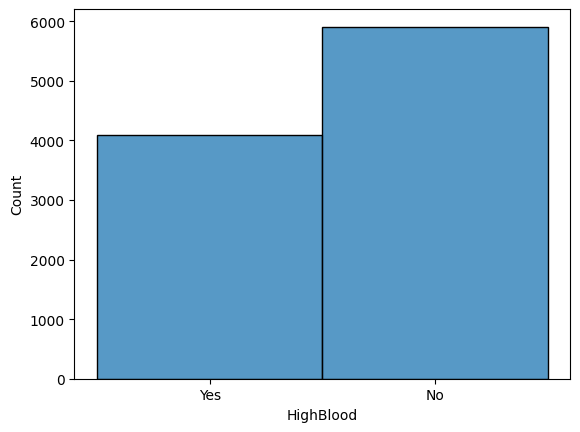

count     10000
unique        2
top          No
freq       5910
Name: HighBlood, dtype: object


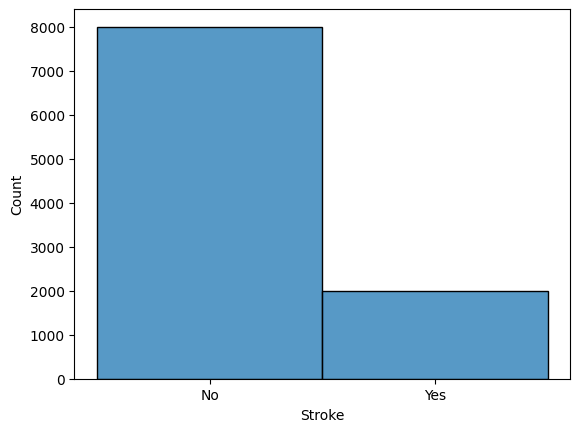

count     10000
unique        2
top          No
freq       8007
Name: Stroke, dtype: object


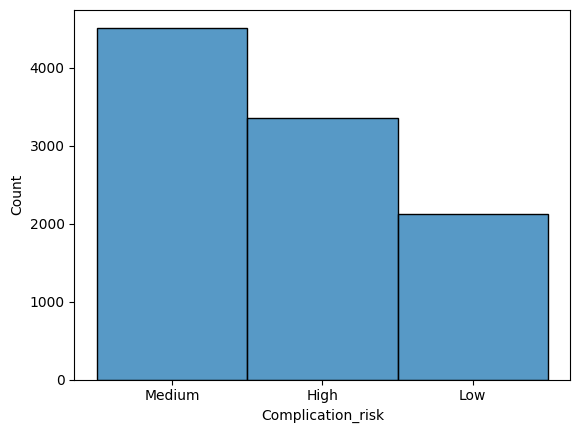

count      10000
unique         3
top       Medium
freq        4517
Name: Complication_risk, dtype: object


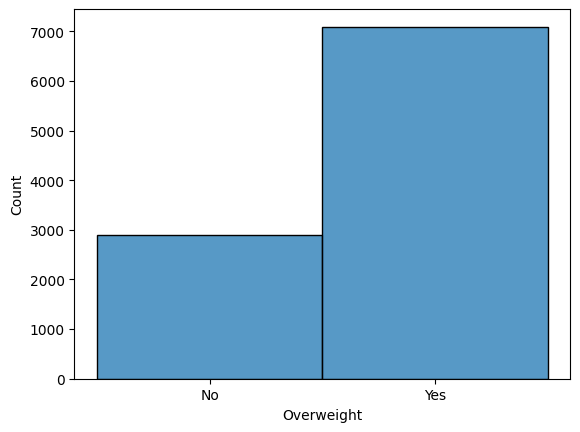

count     10000
unique        2
top         Yes
freq       7094
Name: Overweight, dtype: object


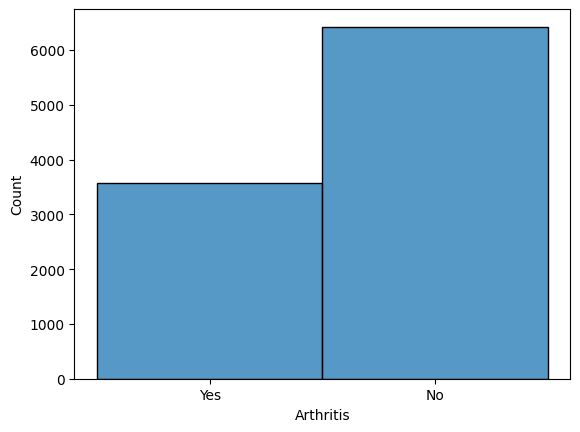

count     10000
unique        2
top          No
freq       6426
Name: Arthritis, dtype: object


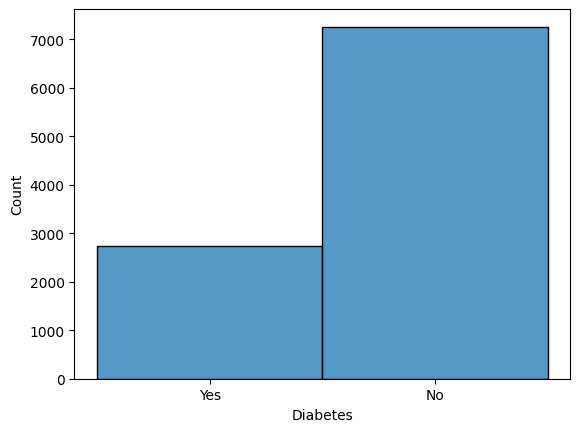

count     10000
unique        2
top          No
freq       7262
Name: Diabetes, dtype: object


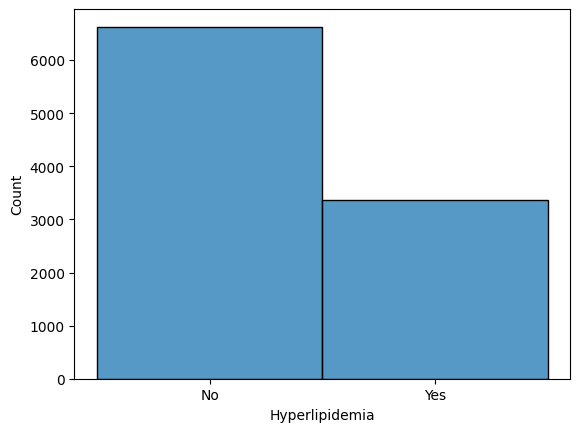

count     10000
unique        2
top          No
freq       6628
Name: Hyperlipidemia, dtype: object


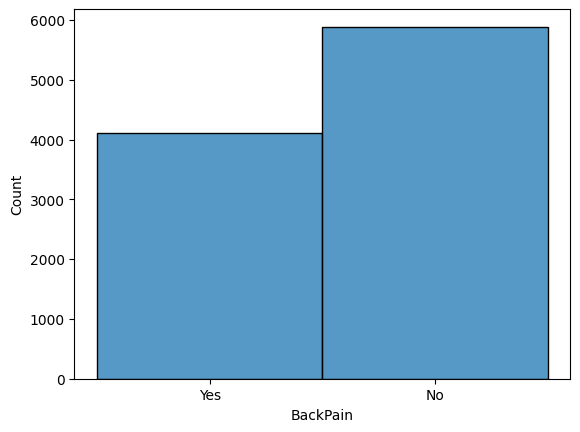

count     10000
unique        2
top          No
freq       5886
Name: BackPain, dtype: object


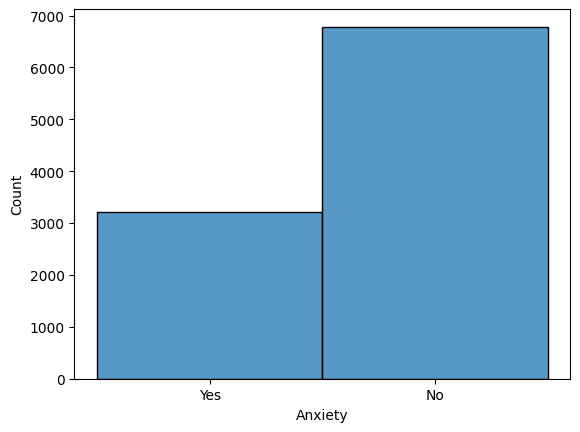

count     10000
unique        2
top          No
freq       6785
Name: Anxiety, dtype: object


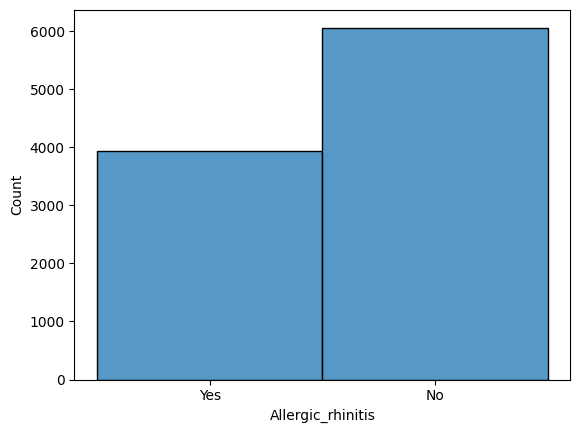

count     10000
unique        2
top          No
freq       6059
Name: Allergic_rhinitis, dtype: object


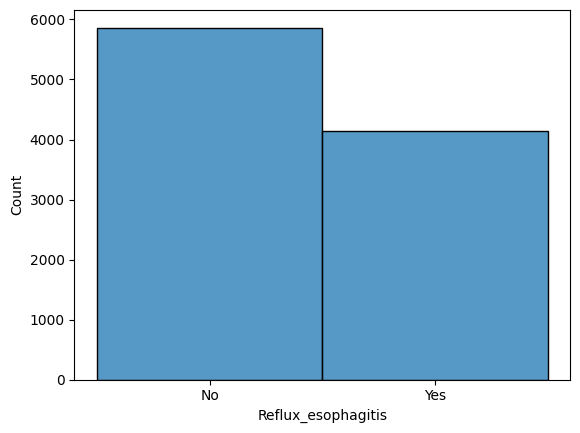

count     10000
unique        2
top          No
freq       5865
Name: Reflux_esophagitis, dtype: object


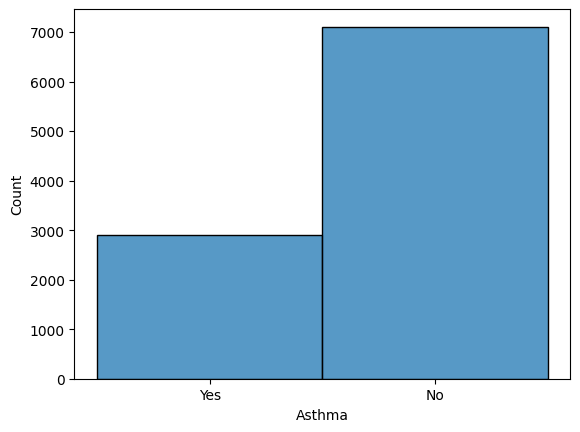

count     10000
unique        2
top          No
freq       7107
Name: Asthma, dtype: object


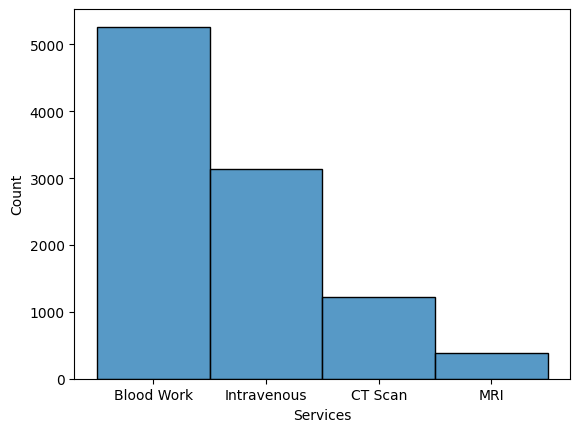

count          10000
unique             4
top       Blood Work
freq            5265
Name: Services, dtype: object


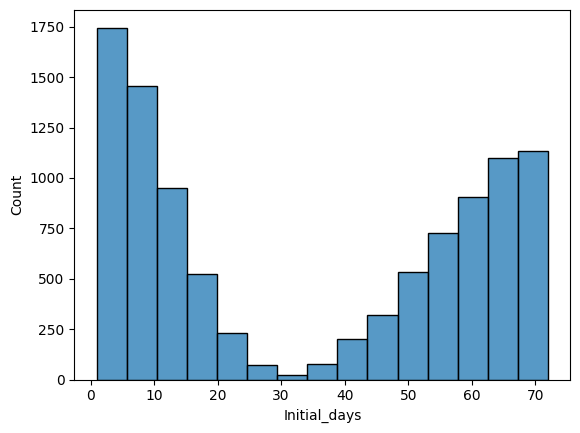

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64


In [48]:
for column in data.columns:
  sns.histplot(data, x=column)
  plt.show()
  print(data[column].describe())

Bivariate Visualizations against Target Variable

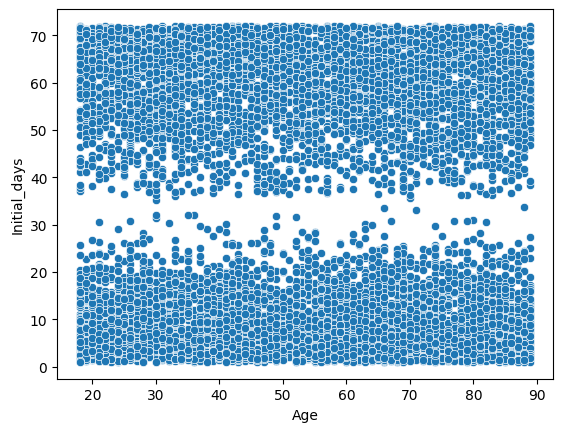

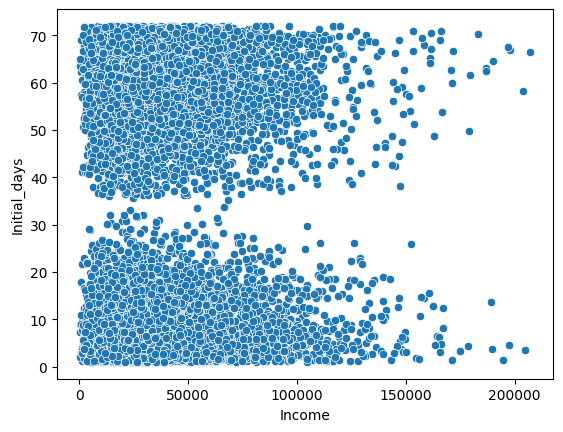

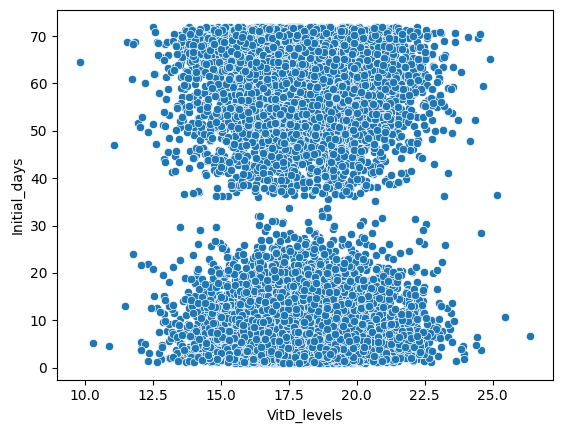

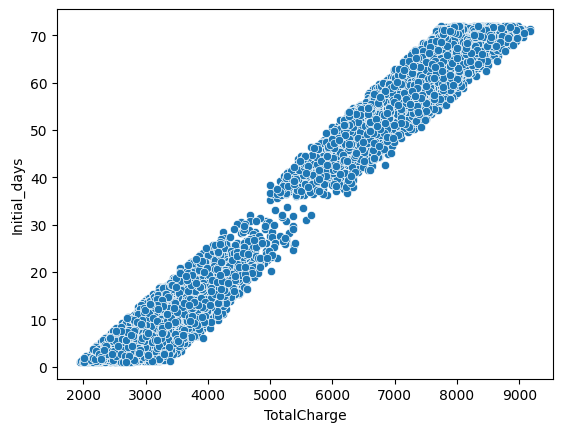

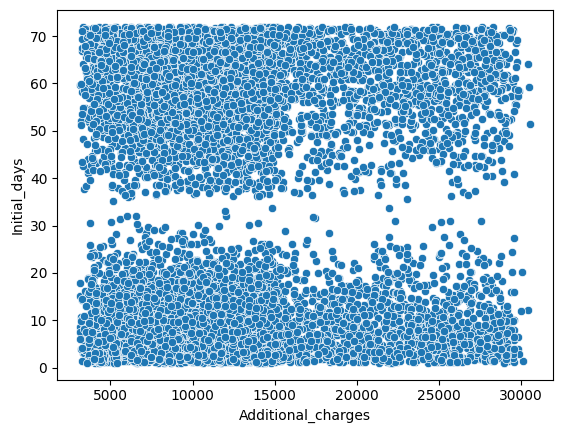

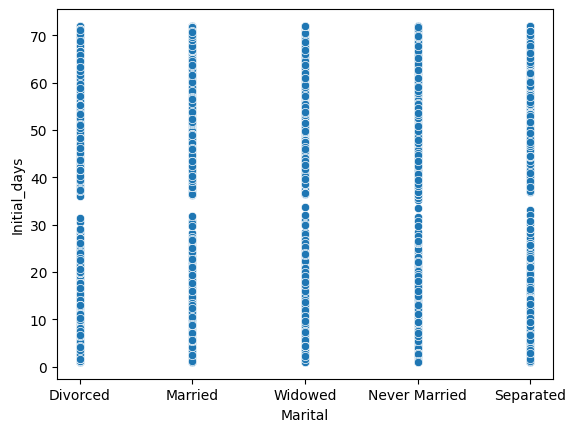

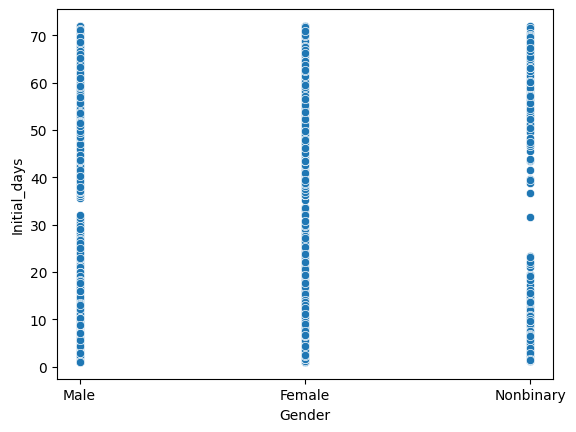

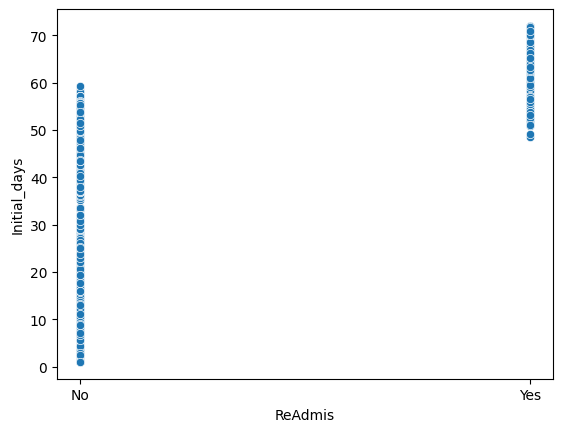

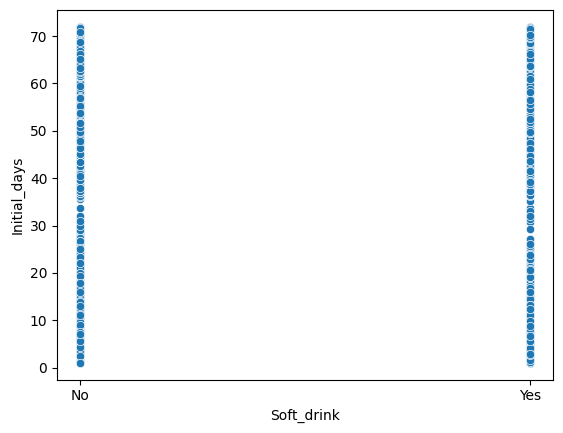

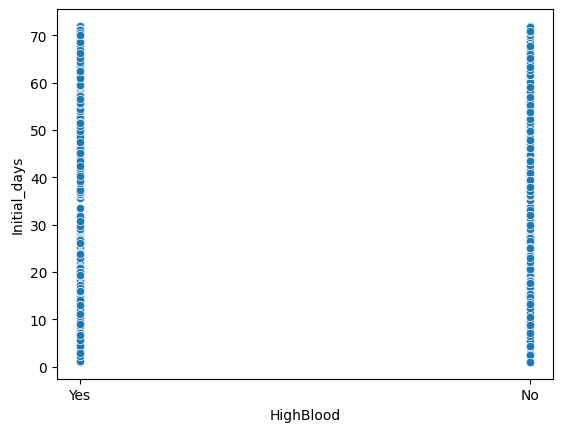

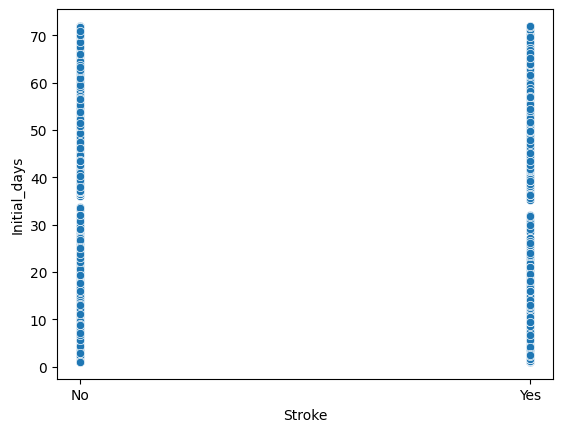

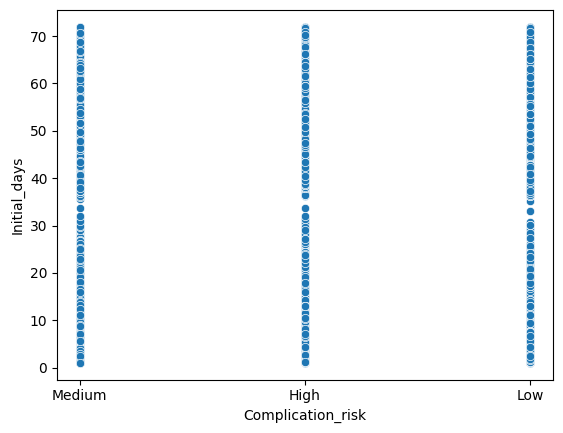

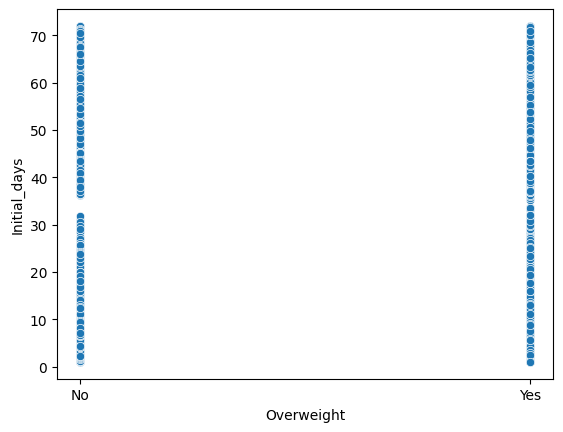

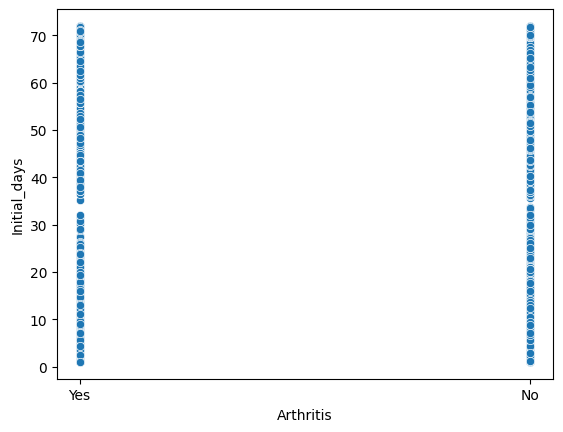

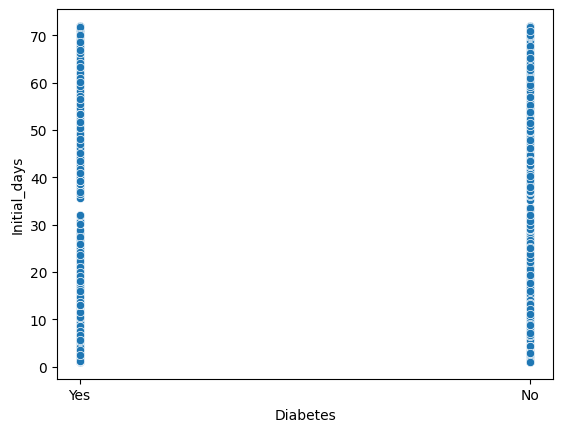

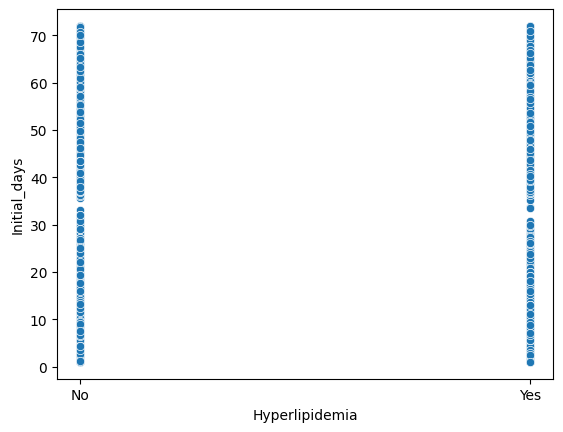

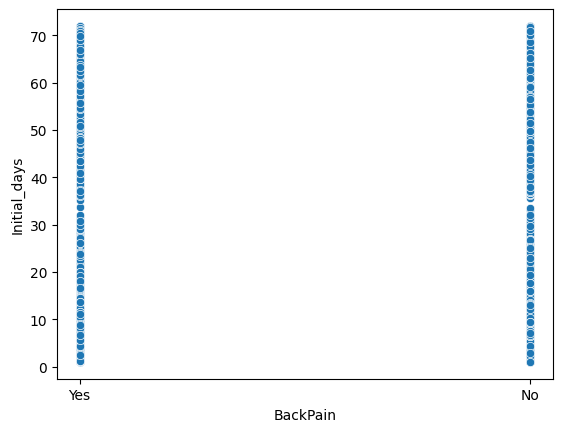

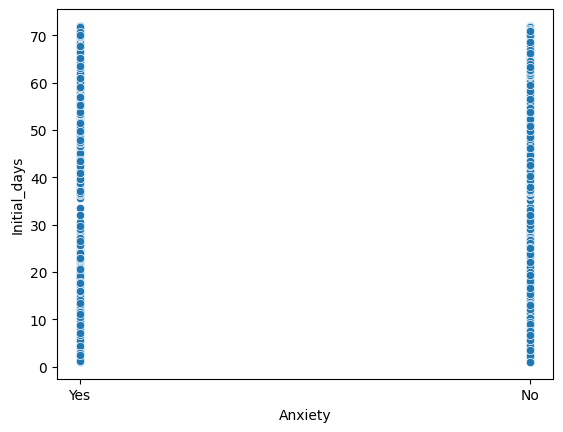

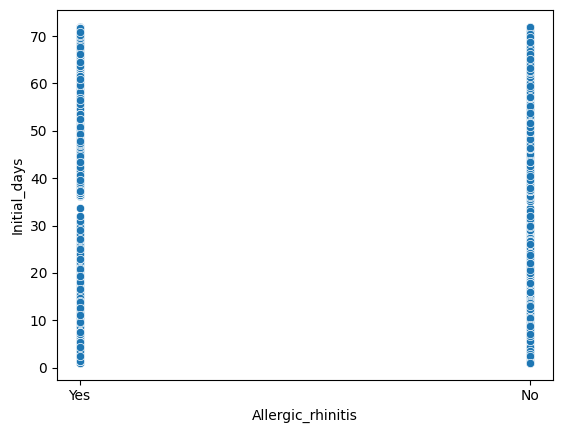

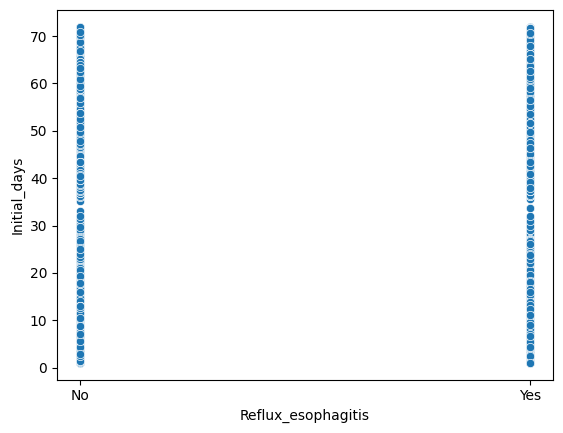

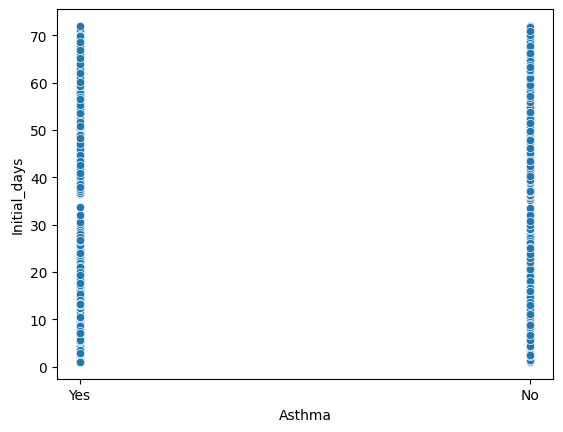

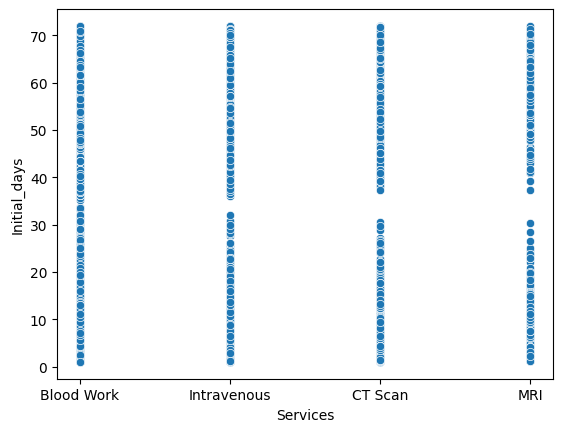

In [49]:
for column in data.columns:
    if column != 'Initial_days':
        sns.scatterplot(x = column, y = 'Initial_days', data = data)
        plt.show()

#Categorical Variables

Summary Statistics for feature variables Used for Analysis and Distribution Visualizations

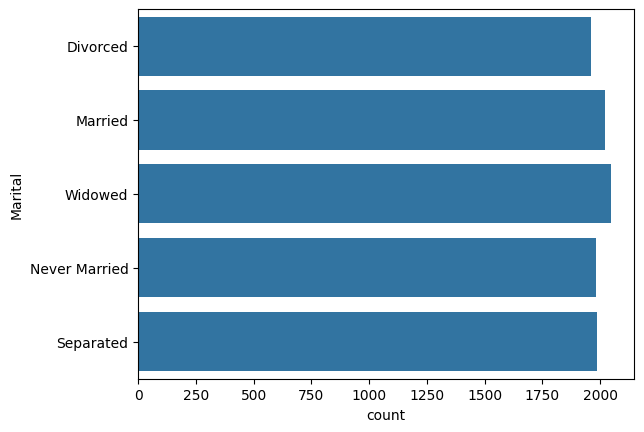

         Marital  Count
0       Divorced   1961
1        Married   2023
2  Never Married   1984
3      Separated   1987
4        Widowed   2045


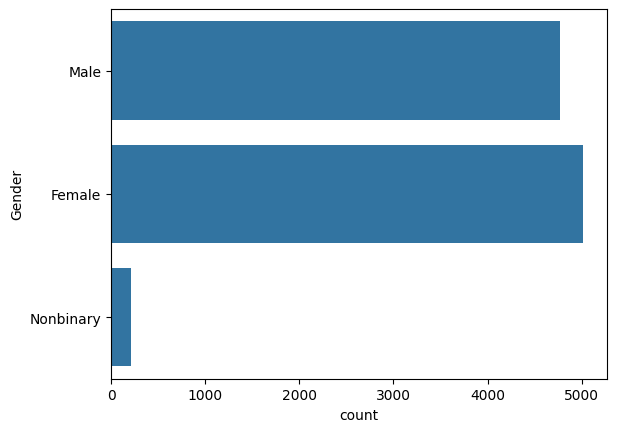

      Gender  Count
0     Female   5018
1       Male   4768
2  Nonbinary    214


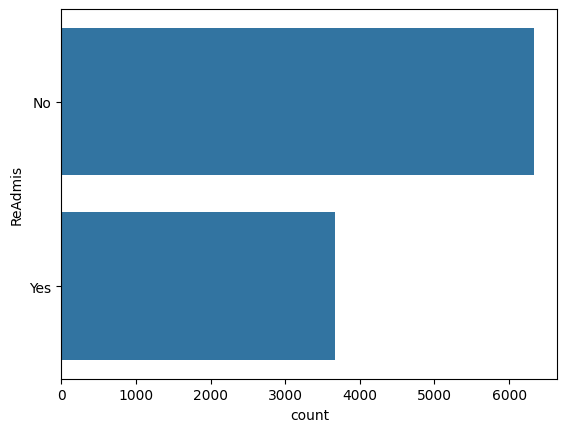

  ReAdmis  Count
0      No   6331
1     Yes   3669


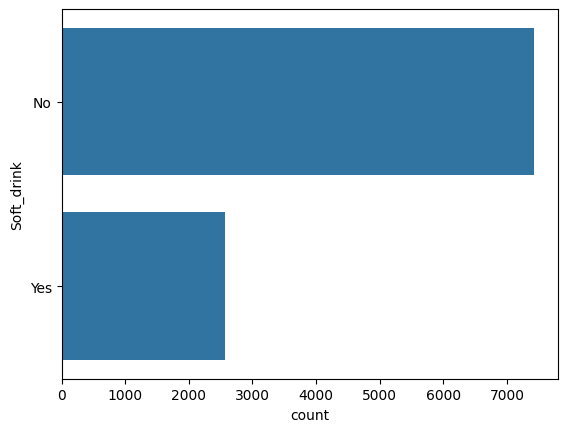

  Soft_drink  Count
0         No   7425
1        Yes   2575


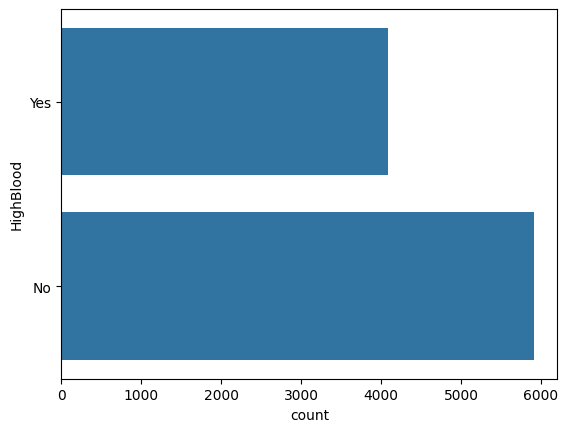

  HighBlood  Count
0        No   5910
1       Yes   4090


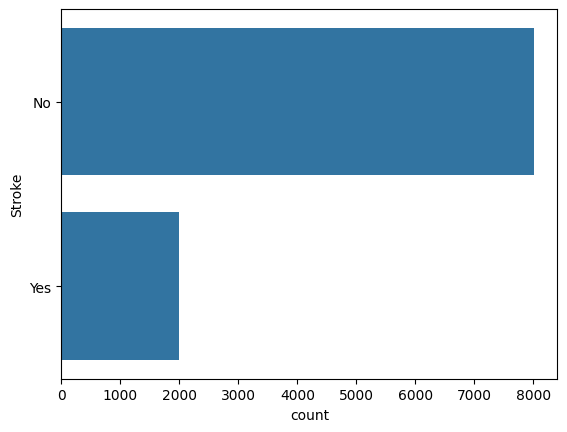

  Stroke  Count
0     No   8007
1    Yes   1993


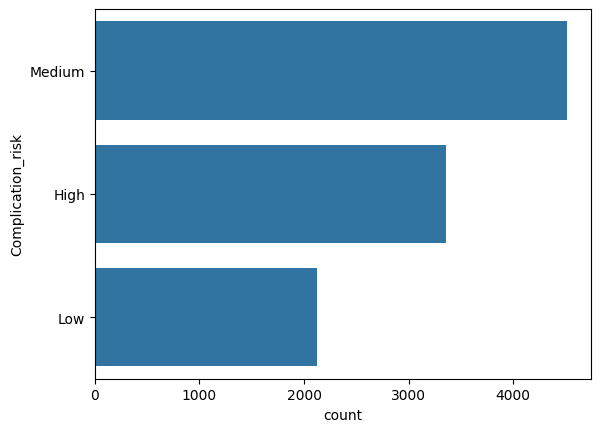

  Complication_risk  Count
0              High   3358
1               Low   2125
2            Medium   4517


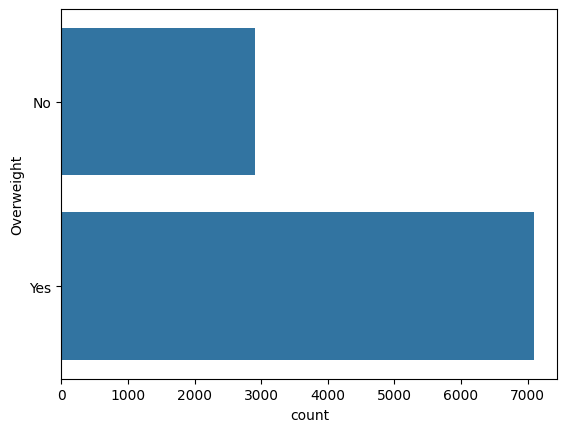

  Overweight  Count
0         No   2906
1        Yes   7094


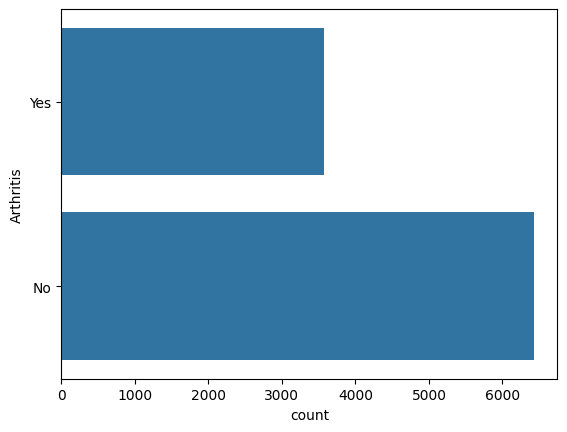

  Arthritis  Count
0        No   6426
1       Yes   3574


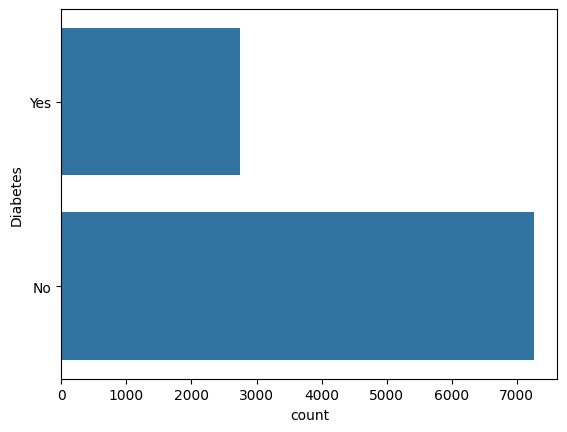

  Diabetes  Count
0       No   7262
1      Yes   2738


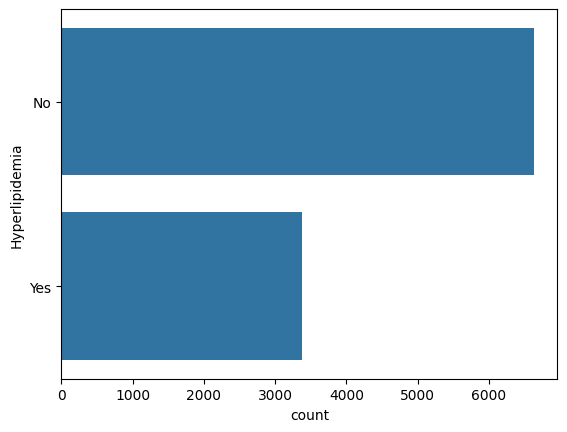

  Hyperlipidemia  Count
0             No   6628
1            Yes   3372


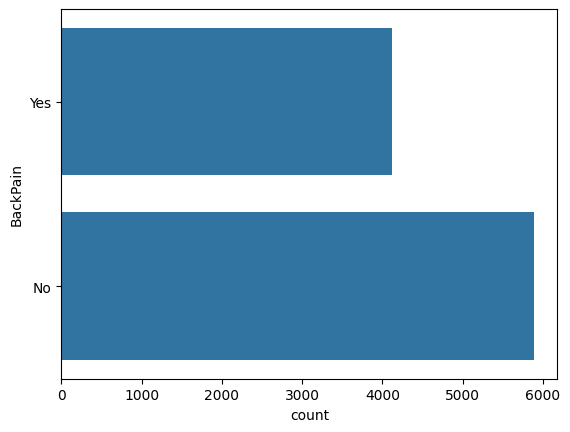

  BackPain  Count
0       No   5886
1      Yes   4114


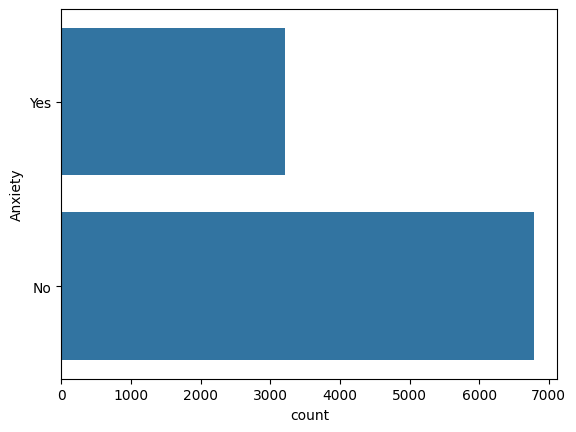

  Anxiety  Count
0      No   6785
1     Yes   3215


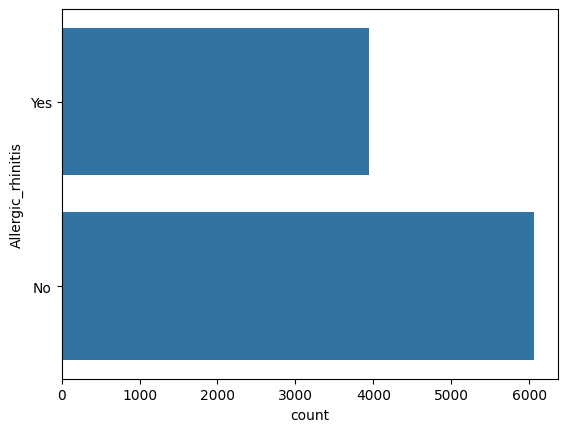

  Allergic_rhinitis  Count
0                No   6059
1               Yes   3941


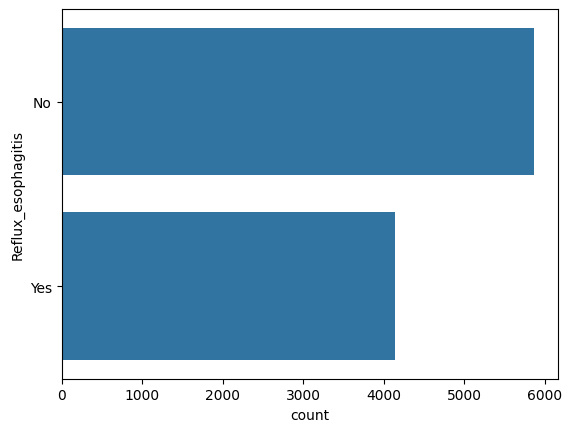

  Reflux_esophagitis  Count
0                 No   5865
1                Yes   4135


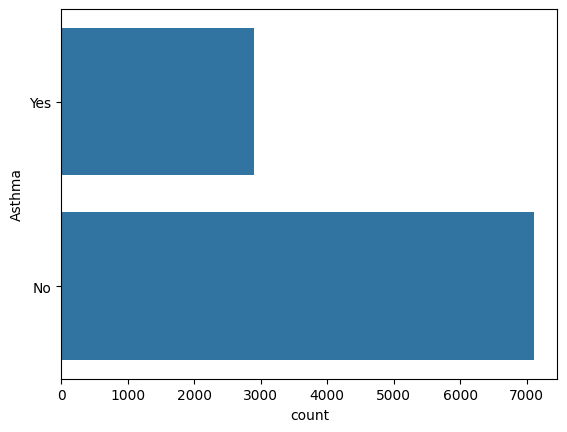

  Asthma  Count
0     No   7107
1    Yes   2893


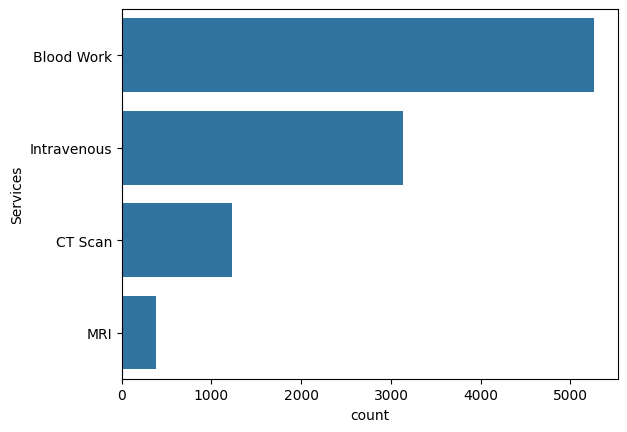

      Services  Count
0   Blood Work   5265
1      CT Scan   1225
2  Intravenous   3130
3          MRI    380


In [50]:
for column in categorical:
  ax = sns.countplot(y=column, data=data)
  plt.show()
  print(data.groupby([column]).size().reset_index(name='Count'))

Bivariate Visualizations against Target Variable

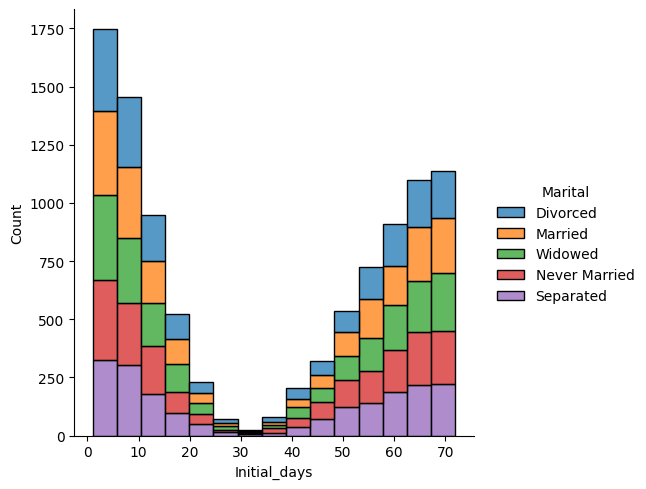

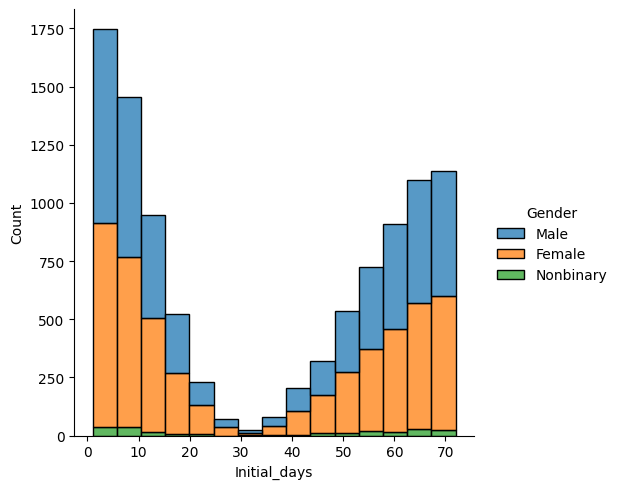

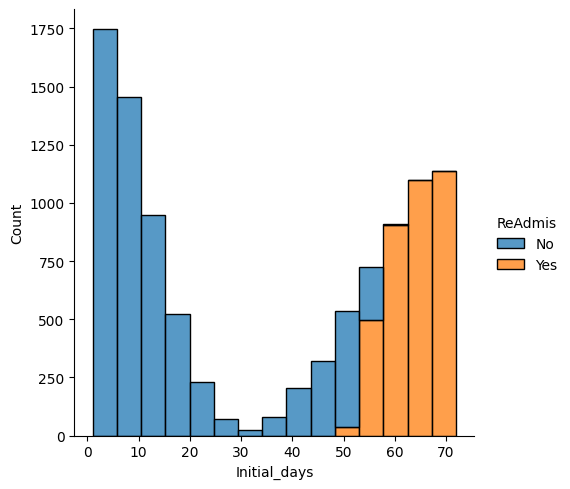

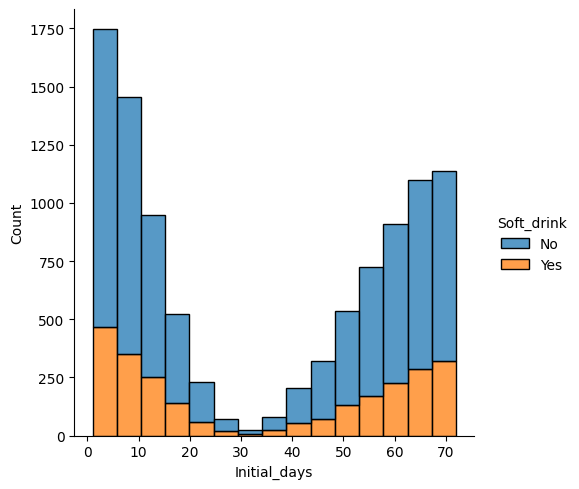

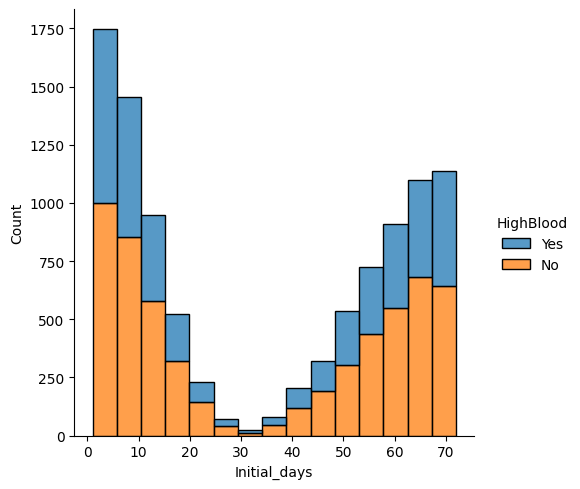

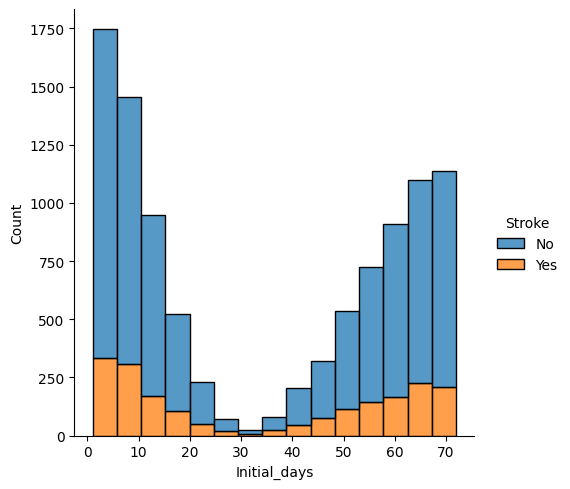

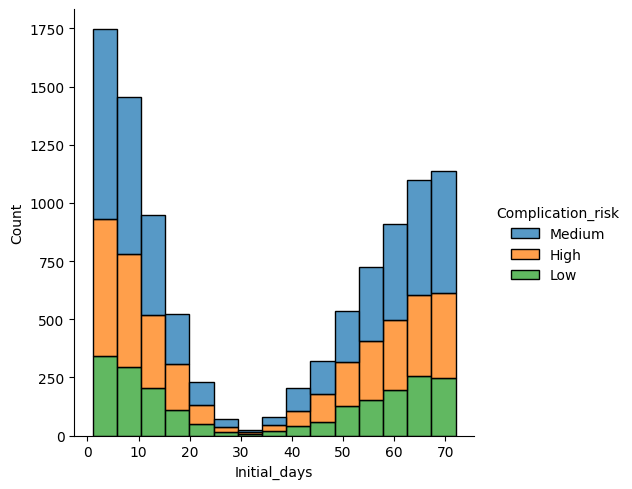

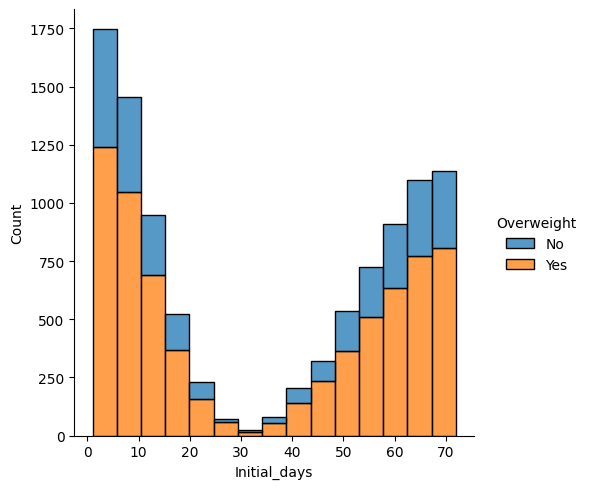

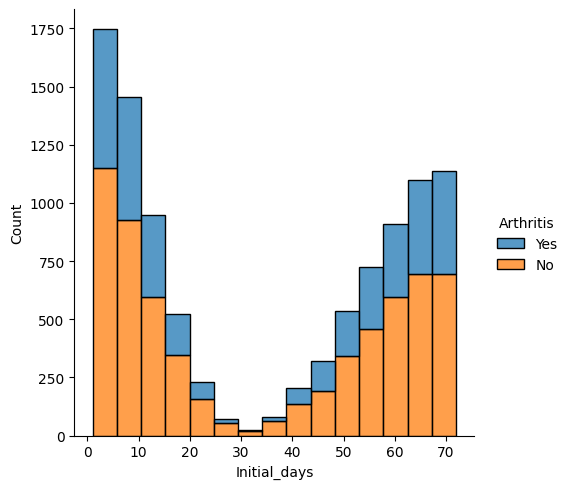

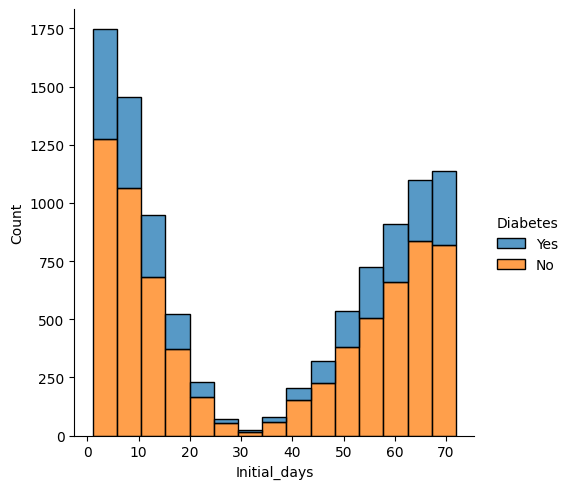

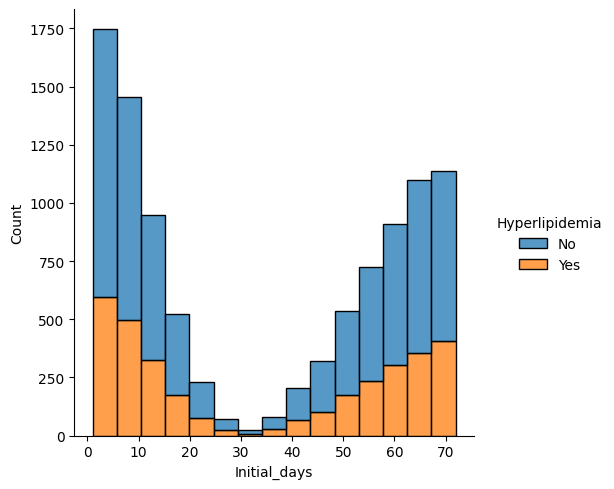

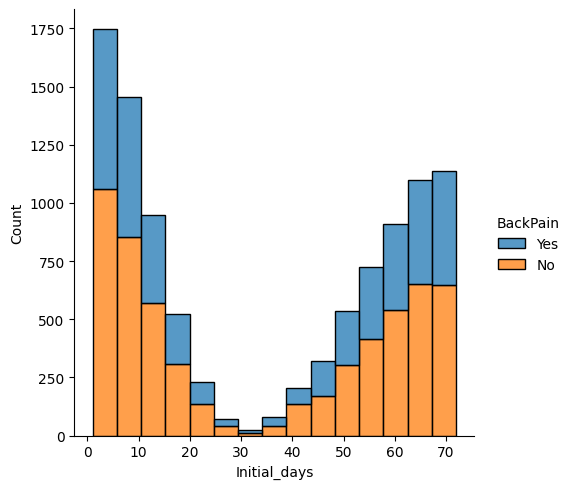

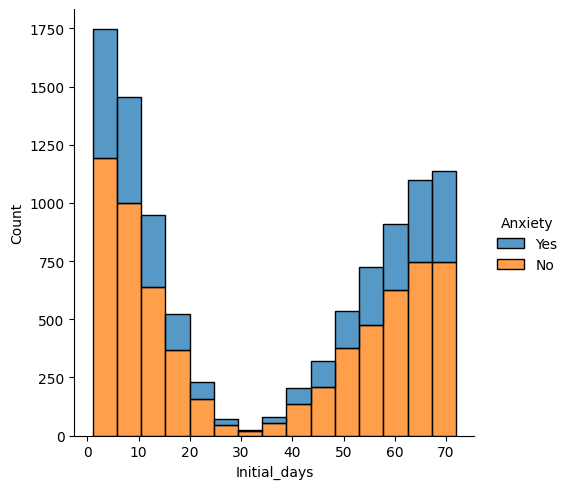

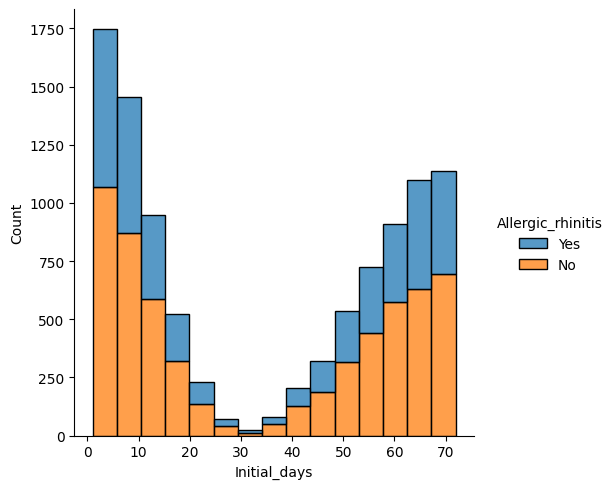

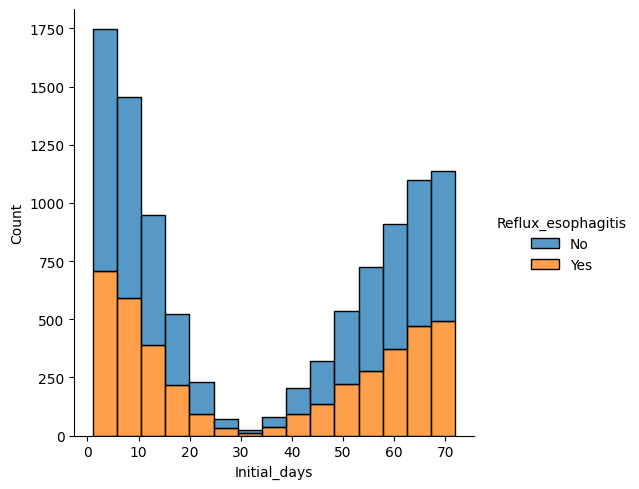

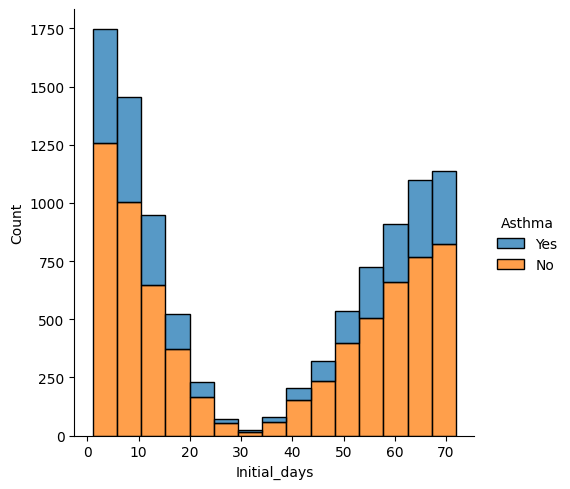

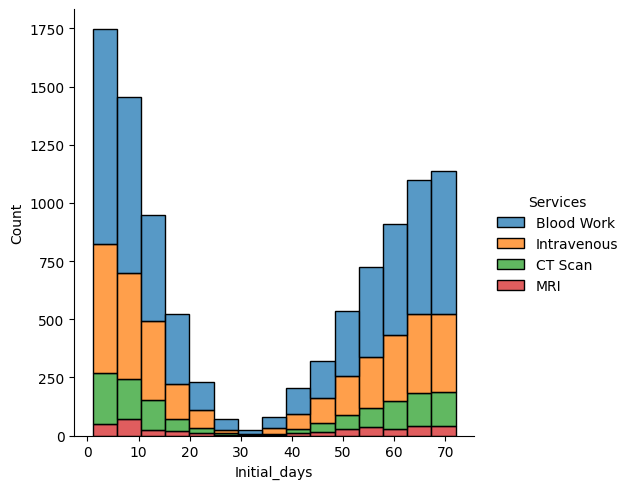

In [51]:
for column in categorical:
    sns.displot(data=data, x='Initial_days', hue=column, multiple = 'stack')
    plt.show()

#Initial Model


Hot encode categorical variables using pd.get_dummies in preparation for fitting the initial multiple linear regression model

In [52]:
hot_categorical_data = pd.get_dummies(data[categorical], columns = categorical, drop_first=True, dtype='int')
hot_categorical = hot_categorical_data.columns

Fit Initial Model to selected feattures

In [53]:
X_initial = sm.add_constant(pd.concat([data[continuous], hot_categorical_data], axis=1))
y = data[target]
model_initial = sm.OLS(y, X_initial).fit()
model_initial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 2.547e+04
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:59:44   Log-Likelihood:                -25295.
No. Observations:               10000   AIC:                         5.065e+04
Df Residuals:                    9970   BIC:                         5.087e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -29.0914      0.334    -87.115      0.000     -29.746     -28.437
Age                          0.0677      0.004     15.258      0.000       0.059       0.076
Income                    2.121e-06   1.07e-06      1.987      0.047    2.87e-08    4.21e-06
VitD_levels                 -0.0463      0.015     -3.065      0.002      -0.076      -0.017
TotalCharge                  0.0117   2.66e-05    442.224      0.000       0.012       0.012
Additional_charges          -0.0003   1.85e-05    -15.930      0.000      -0.000      -0.000
Marital_Married             -0.0815      0.097     -0.844      0.399      -0.271       0.108
Marital_Never Married        0.1064      0.097      1.097      0.273      -0.084       0.297
Marital_Separated            0.0386      0.097      0.398      0.690      -0.151       0.229
Marital_Widowed             -0.0509      0.096     -0.529      0.597      -0.240       0.138
Gender_Male                  0.1103      0.062      1.789      0.074      -0.011       0.231
Gender_Nonbinary             0.0467      0.213      0.220      0.826      -0.370       0.463
ReAdmis_Yes                  1.6423      0.119     13.754      0.000       1.408       1.876
Soft_drink_Yes              -0.1472      0.070     -2.115      0.034      -0.284      -0.011
HighBlood_Yes                1.2199      0.171      7.114      0.000       0.884       1.556
Stroke_Yes                   0.1699      0.076      2.221      0.026       0.020       0.320
Complication_risk_Low        4.6986      0.085     55.048      0.000       4.531       4.866
Complication_risk_Medium     4.7788      0.071     67.598      0.000       4.640       4.917
Overweight_Yes               0.0673      0.067      1.003      0.316      -0.064       0.199
Arthritis_Yes               -0.8334      0.064    -13.091      0.000      -0.958      -0.709
Diabetes_Yes                -0.8117      0.068    -11.879      0.000      -0.946      -0.678
Hyperlipidemia_Yes          -1.2376      0.064    -19.208      0.000      -1.364      -1.111
BackPain_Yes                -0.9954      0.062    -16.047      0.000      -1.117      -0.874
Anxiety_Yes                 -1.0323      0.065    -15.816      0.000      -1.160      -0.904
Allergic_rhinitis_Yes       -0.7369      0.062    -11.823      0.000      -0.859      -0.615
Reflux_esophagitis_Yes      -0.6784      0.062    -10.961      0.000      -0.800      -0.557
Asthma_Yes                   0.0538      0.067      0.802      0.423      -0.078       0.185
Services_CT Scan            -0.1182      0.097     -1.223      0.221      -0.307       0.071
Services_Intravenous         0.0085      0.069      0.123      0.902      -0.126       0.143
Services_MRI                -0.1178      0.162     -0.728      0.466      -0.435       0.199
==============

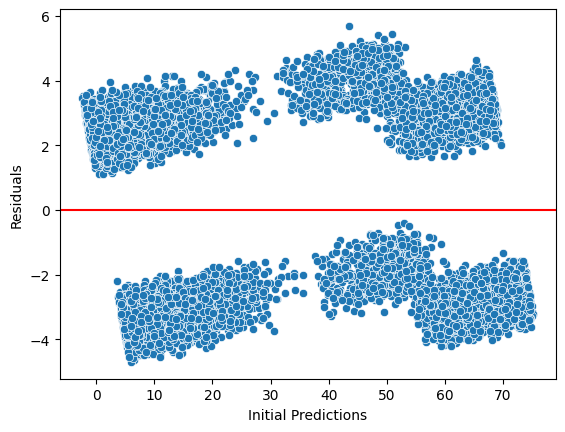

In [54]:
initial_predictions = model_initial.predict(X_initial)
residuals = data['Initial_days'] - initial_predictions
residual_data = pd.DataFrame({'Initial Predictions': initial_predictions, 'Residuals': residuals})
sns.scatterplot(data= residual_data, x='Initial Predictions', y='Residuals')
plt.axhline(y=0, color="red")
plt.show();

In [55]:
print(f'Root Mean Squared Residuals: {np.sqrt(model_initial.mse_resid)}')

Root Mean Squared Residuals: 3.0407410107189485


#Initial Model Summary Analysis
The intial model had an R-squared value of .987 which is indicates that it is able to account for 98.7% of the variance within the dataset.

Another Metric that can be addressed is the residual standard error, which is documented above to be around 3.04. This metric communicates that the average error the models predictions may contain are around 3.04 days off of the true values. Which when taking into consideration that the range of the 'Initial_days' data is from 0 to 71 days, and that 3.04 is well below the standard deviation (26.3), making this model reasonably reliable to use for business purposes.

As an initial model, this is a fantastic place to start in terms of the model accuracy. However, in efforts to optimize this model, a feature reduction process will be undergone in order to see if the simliar results can be achieved with less features for the sake of efficiency.

#Feature Reduction
##Continuous Variables

Standardization of continuous variables and creation of covariance matrix with heatmap as visual aid

,Age,Income,VitD_levels,TotalCharge,Additional_charges
Age,1.000100,-0.012229,0.010316,0.016877,0.716925
Income,-0.012229,1.000100,-0.013116,-0.014347,-0.009826
VitD_levels,0.010316,-0.013116,1.000100,-0.001403,0.008291
TotalCharge,0.016877,-0.014347,-0.001403,1.000100,0.029259
Additional_charges,0.716925,-0.009826,0.008291,0.029259,1.000100


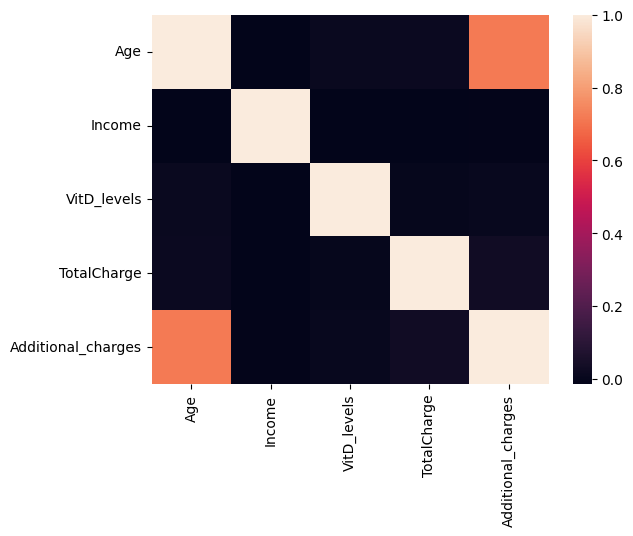

In [56]:
standardized = StandardScaler().set_output(transform='pandas').fit_transform(data[continuous])
covariance_matrix = standardized.cov()
sns.heatmap(covariance_matrix, annot=False)
covariance_matrix

## Perform Principal Component Analysis on feature columns to reduce dimensionality within the dataset


Fit a PCA object to the current set of features

In [57]:
pca = PCA(n_components=len(continuous), random_state=0)
pca.set_output(transform='pandas').fit_transform(standardized)
PCA_matrix = pd.DataFrame(pca.components_.T, columns = range(1, len(continuous) + 1), index=continuous)
PCA_matrix

,1,2,3,4,5
Age,0.705894,0.036017,0.019991,-0.018185,-0.706885
Income,-0.022909,0.729673,0.024507,0.682968,-0.002575
VitD_levels,0.018600,-0.482369,0.725899,0.489940,0.001922
TotalCharge,0.045728,-0.482288,-0.687046,0.541410,-0.012267
Additional_charges,0.706224,0.031602,0.006181,-0.007629,0.707215


Observe the contribuitions of each principal component to the total variance found within the dataset

In [58]:
print(f'The {len(continuous)} Principal Components explain {round(sum(pca.explained_variance_ratio_) * 100, 1)}% of the variance within the dataset.')
for i in range(0, len(continuous)):
    print(f'Component {i + 1} contributes {round(pca.explained_variance_ratio_[i] * 100, 3)}%')

The 5 Principal Components explain 100.0% of the variance within the dataset.
Component 1 contributes 34.379%
Component 2 contributes 20.342%
Component 3 contributes 20.025%
Component 4 contributes 19.593%
Component 5 contributes 5.661%


Visualize Scree Plot

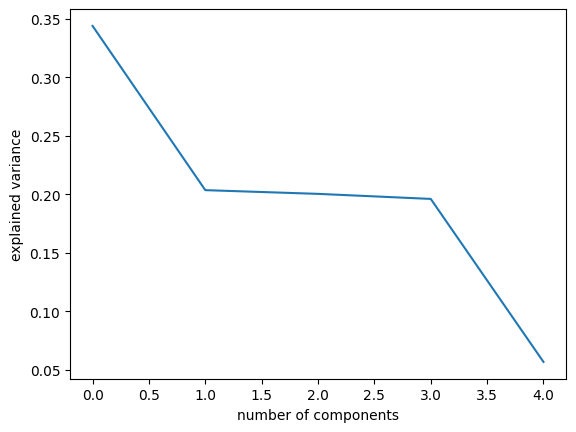

In [59]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

Remove one principal component per the elbow rule

In [60]:
pca_final = PCA(n_components=4, random_state=0)
pca_features = pca_final.set_output(transform='pandas').fit_transform(standardized)
PCA_matrix_final = pd.DataFrame(pca_final.components_.T, columns = range(1, len(continuous)), index=continuous)
PCA_matrix_final

,1,2,3,4
Age,0.705894,0.036017,0.019991,-0.018185
Income,-0.022909,0.729673,0.024507,0.682968
VitD_levels,0.018600,-0.482369,0.725899,0.489940
TotalCharge,0.045728,-0.482288,-0.687046,0.541410
Additional_charges,0.706224,0.031602,0.006181,-0.007629


Refit PCA object to observe the amount of variance lost from removal of principal components as well as reproduce scree plot to visualize the results

The revised 4 Principal Components explain 94.339% of the variance within the dataset.
Component 1 contributes 34.379%
Component 2 contributes 20.342%
Component 3 contributes 20.025%
Component 4 contributes 19.593%


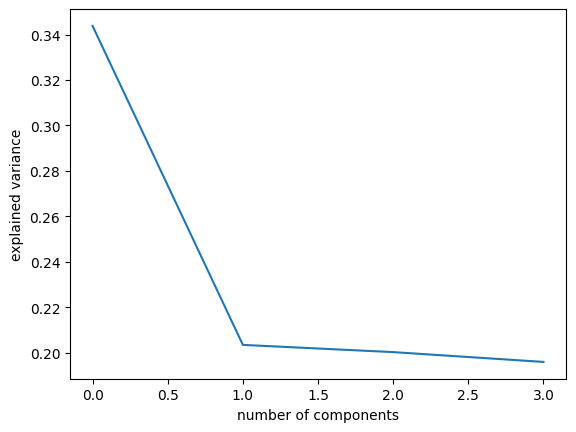

In [61]:
print(f'The revised 4 Principal Components explain {round(sum(pca_final.explained_variance_ratio_) * 100, 3)}% of the variance within the dataset.')
for i in range(0, len(continuous) - 1):
    print(f'Component {i + 1} contributes {round(pca.explained_variance_ratio_[i] * 100, 3)}%')
plt.plot(pca_final.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

With the feature reduction process complete for the continuous variables, there remains 4 Principal Components as opposed to the original 5, accounting for 94.339% of the variance originally explained by the 5 Principal Components.

Using SelectKBest, the initial set of continuous variables will be reduced down to 4 per the Principal Component Analysis and be saved to the variable 'continuous_features'.

In [62]:
continuous_features = SelectKBest(f_regression, k = 4).set_output(transform='pandas').fit_transform(data[continuous], y)
continuous_features

,Age,Income,TotalCharge,Additional_charges
0,53,86575.93,3726.702860,17939.403420
1,51,46805.99,4193.190458,17612.998120
2,53,14370.14,2434.234222,17505.192460
3,78,39741.49,2127.830423,12993.437350
4,22,1209.56,2113.073274,3716.525786
...,...,...,...,...
9995,25,45967.61,6850.942000,8927.642000
9996,87,14983.02,7741.690000,28507.150000
9997,45,65917.81,8276.481000,15281.210000
9998,43,29702.32,7644.483000,7781.678000


##Categorical Variables

Create correlation heat map and matrix to observe for multi-colinearity among categorical feature variables

,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,ReAdmis_Yes,Soft_drink_Yes,HighBlood_Yes,Stroke_Yes,...,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Services_CT Scan,Services_Intravenous,Services_MRI
Marital_Married,1.000000,-0.250536,-0.250772,-0.255332,0.016165,-0.017704,0.006591,0.007445,0.024097,-0.004477,...,-0.012224,-0.015352,0.037302,0.005653,0.008016,-0.012895,-0.001786,0.000139,-0.007086,0.011882
Marital_Never Married,-0.250536,1.000000,-0.247738,-0.252243,0.005537,-0.016388,0.006800,0.013832,-0.012983,-0.004024,...,0.002126,0.009014,-0.011831,-0.013882,-0.003538,0.006933,-0.006067,-0.005384,0.003790,-0.004449
Marital_Separated,-0.250772,-0.247738,1.000000,-0.252481,-0.010237,0.000828,-0.000536,-0.005532,-0.004936,0.007523,...,0.014028,-0.007960,-0.001758,0.009755,-0.003629,0.001718,-0.002675,0.003510,-0.018878,-0.004596
Marital_Widowed,-0.255332,-0.252243,-0.252481,1.000000,-0.004992,0.010686,0.008586,-0.013942,-0.015837,-0.011524,...,-0.011076,0.021726,-0.021319,-0.003433,-0.011636,0.004225,0.014972,-0.010218,0.026153,0.004266
Gender_Male,0.016165,0.005537,-0.010237,-0.004992,1.000000,-0.141169,0.009813,-0.005385,0.004434,-0.004642,...,-0.001562,0.014073,-0.015687,-0.007679,-0.000848,-0.015274,0.004247,-0.007988,-0.005779,-0.009617
Gender_Nonbinary,-0.017704,-0.016388,0.000828,0.010686,-0.141169,1.000000,0.006428,0.006155,0.014721,0.004065,...,-0.002469,0.011458,0.019604,0.004733,-0.004719,-0.013315,0.003185,-0.000453,-0.008914,-0.022162
ReAdmis_Yes,0.006591,0.006800,-0.000536,0.008586,0.009813,0.006428,1.000000,0.007703,0.002270,0.000918,...,-0.003058,0.004307,0.013313,0.002406,-0.004651,0.005422,-0.017133,0.024395,-0.020313,0.009309
Soft_drink_Yes,0.007445,0.013832,-0.005532,-0.013942,-0.005385,0.006155,0.007703,1.000000,-0.006129,0.001604,...,0.016907,0.016791,0.017496,0.016226,-0.015354,-0.002676,0.010114,-0.006583,0.003958,0.012141
HighBlood_Yes,0.024097,-0.012983,-0.004936,-0.015837,0.004434,0.014721,0.002270,-0.006129,1.000000,0.007568,...,-0.005858,-0.009529,0.003048,0.008303,0.011709,0.001150,0.006174,0.011772,-0.008408,0.001681
Stroke_Yes,-0.004477,-0.004024,0.007523,-0.011524,-0.004642,0.004065,0.000918,0.001604,0.007568,1.000000,...,0.005792,-0.014847,0.003602,-0.013801,-0.004837,-0.000054,0.002443,0.013635,-0.019871,-0.003580


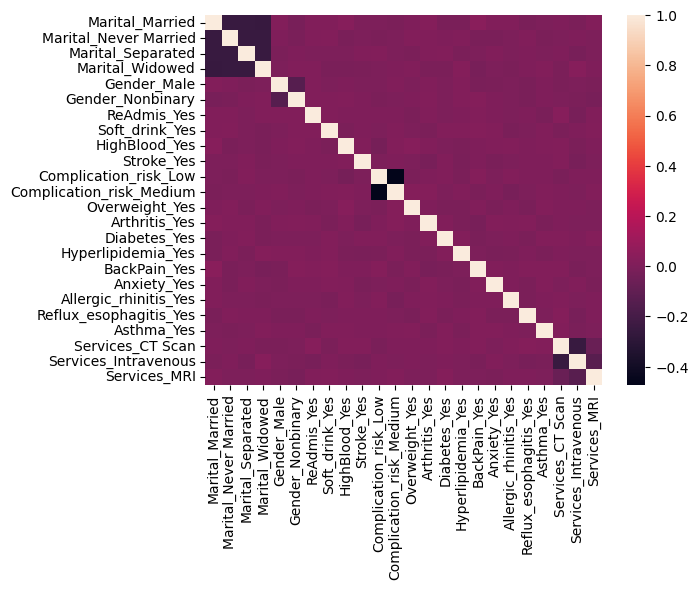

In [63]:
correlation_heatmap = hot_categorical_data.corr()
sns.heatmap(correlation_heatmap, annot=False)
correlation_heatmap

Fit a MCA object to the current set of features

In [64]:
mca = MCA(n_components=len(hot_categorical))
mca.set_output(transform='pandas').fit_transform(hot_categorical_data)
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.062,6.16%,6.16%
1,0.054,5.43%,11.59%
2,0.053,5.28%,16.87%
3,0.052,5.23%,22.10%
4,0.051,5.15%,27.25%
5,0.048,4.77%,32.02%
6,0.045,4.46%,36.48%
7,0.044,4.36%,40.84%
8,0.043,4.34%,45.18%


Visualize Scree Plot using Eigen values

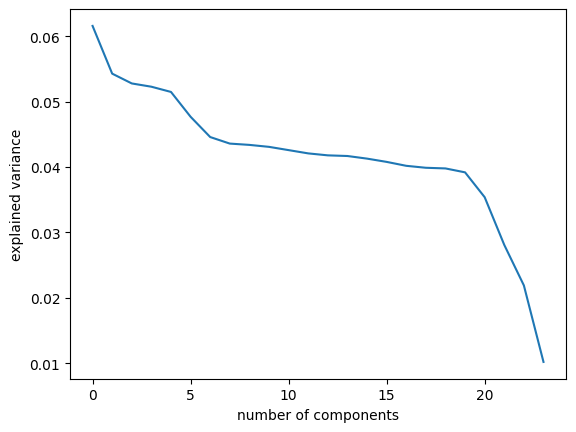

In [65]:
pct_var = []
for percent in mca.eigenvalues_summary['% of variance']:
  pct_var.append(float(percent.strip('%')) / 100)
plt.plot(pct_var)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

Refit the MCA model to 20 components per the elbow rule to observe the change in total variance accounted for by the reduced number of features along with a scree plot to visualize the changes

In [66]:
mca_final = MCA(n_components=20)
mca_features = mca_final.set_output(transform='pandas').fit_transform(hot_categorical_data)
mca_final.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.062,6.16%,6.16%
1,0.054,5.43%,11.59%
2,0.053,5.28%,16.87%
3,0.052,5.23%,22.10%
4,0.051,5.15%,27.25%
5,0.048,4.77%,32.02%
6,0.045,4.46%,36.48%
7,0.044,4.36%,40.84%
8,0.043,4.34%,45.18%


Observe scree plot after feature reduction to confirm changes

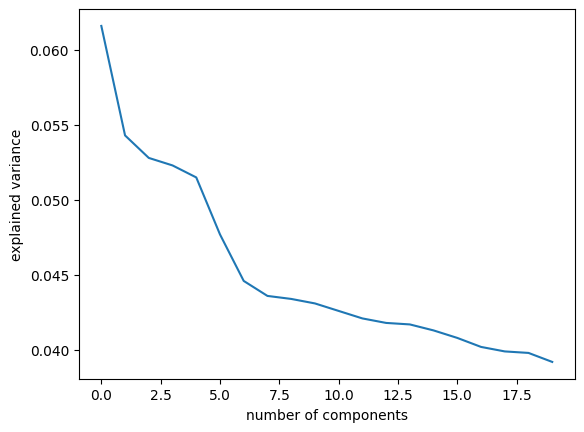

In [67]:
final_pct_var = []
for percent in mca_final.eigenvalues_summary['% of variance']:
  final_pct_var.append(float(percent.strip('%')) / 100)
plt.plot(final_pct_var)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

Upon completion of the feature reduction process using Multi Correspondance Analysis, there remains 20 of the original 23 components from the original feature set post hot-encoding and accounts for 90.43% of the variance found within the original 23 component dataset.

'SelectKBest' will be used to reduce the original set of categorical variables down to 20 components and will be saved to the 'categorical_features' variable.

In [68]:
categorical_features = SelectKBest(f_regression, k = 20).set_output(transform='pandas').fit_transform(hot_categorical_data, y)
categorical_features

,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,ReAdmis_Yes,HighBlood_Yes,Complication_risk_Low,Complication_risk_Medium,Overweight_Yes,Arthritis_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Services_CT Scan,Services_Intravenous,Services_MRI
0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
2,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0
9996,0,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,1,1,0,0
9997,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0
9998,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0


Combine PCA features and MCA features into one dataset in preparation for model fitting

In [69]:
final_features = pd.concat([categorical_features, continuous_features], axis=1)


Fit Linear Model to Data

In [70]:
X = sm.add_constant(final_features)
y = data[target]
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 3.030e+04
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:59:48   Log-Likelihood:                -25375.
No. Observations:               10000   AIC:                         5.080e+04
Df Residuals:                    9975   BIC:                         5.098e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -30.1499      0.186   -161.848      0.000     -30.515     -29.785
Marital_Never Married        0.1441      0.084      1.709      0.088      -0.021       0.309
Marital_Separated            0.0711      0.084      0.844      0.399      -0.094       0.236
Marital_Widowed             -0.0007      0.084     -0.009      0.993      -0.164       0.163
Gender_Male                  0.1133      0.062      1.825      0.068      -0.008       0.235
Gender_Nonbinary             0.0510      0.214      0.238      0.812      -0.369       0.471
ReAdmis_Yes                  1.6740      0.120     13.917      0.000       1.438       1.910
HighBlood_Yes                1.2219      0.172      7.095      0.000       0.884       1.560
Complication_risk_Low        4.6915      0.086     54.552      0.000       4.523       4.860
Complication_risk_Medium     4.7726      0.071     67.005      0.000       4.633       4.912
Overweight_Yes               0.0713      0.068      1.054      0.292      -0.061       0.204
Arthritis_Yes               -0.8425      0.064    -13.142      0.000      -0.968      -0.717
Hyperlipidemia_Yes          -1.2485      0.065    -19.236      0.000      -1.376      -1.121
BackPain_Yes                -0.9859      0.062    -15.783      0.000      -1.108      -0.863
Anxiety_Yes                 -1.0350      0.066    -15.741      0.000      -1.164      -0.906
Allergic_rhinitis_Yes       -0.7375      0.063    -11.744      0.000      -0.861      -0.614
Reflux_esophagitis_Yes      -0.6685      0.062    -10.720      0.000      -0.791      -0.546
Asthma_Yes                   0.0378      0.068      0.558      0.577      -0.095       0.170
Services_CT Scan            -0.1374      0.097     -1.412      0.158      -0.328       0.053
Services_Intravenous        -0.0020      0.069     -0.028      0.977      -0.138       0.134
Services_MRI                -0.1599      0.163     -0.981      0.326      -0.479       0.159
Age                          0.0675      0.004     15.158      0.000       0.059       0.076
Income                    2.297e-06   1.08e-06      2.136      0.033    1.89e-07     4.4e-06
TotalCharge                  0.0117   2.67e-05    438.719      0.000       0.012       0.012
Additional_charges          -0.0003   1.86e-05    -15.851      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    42447.671   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1237.076
Skew:                           0.032   Prob(JB):                    2.36e-269
Kurtosis:                       1.278   Cond. No.                     3.61e+05
==============================================================================

Note

Residuals Plot

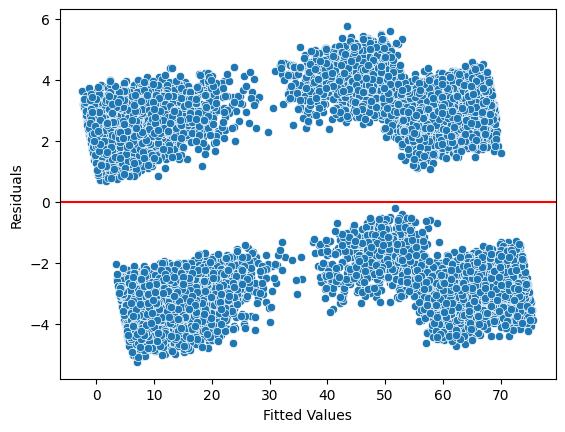

In [71]:
fitted = model.predict(X)
residuals = data['Initial_days'] - fitted
residual_data = pd.DataFrame({'Fitted Values': fitted, 'Residuals': residuals})
sns.scatterplot(data= residual_data, x='Fitted Values', y='Residuals')
plt.axhline(y=0, color="red")
plt.show();

Residual Standard Error Equation

In [72]:
print(f'Root Mean Squared Residuals: {np.sqrt(model.mse_resid)}')

Root Mean Squared Residuals: 3.0641598417735567


#Model Summary Analysis
Again referring to the R-squared value, the final model with a reduced feature set had an R-squared value of .986 which is ever so slightly worse than the inital model that was created with the full feature set (.987). With this being the case, the trade-off of losing 0.1% of explained variance from our original dataset is well worth the optimization of requiring 4 fewer features to achieve this accuracy.

As for the residual standard error, which stood to be about 3.06, reflected a similiar trend for this final model in comparison to the initial model (3.04). With these negligible drops in performance while gaining the optimization of requiring less features in order to achieve these results, it can be concluded that the feature reduction process proved successful.

The statistical and practical significance of this model is that since the model is capable of expressing 98.6% of the variance within the collected dataset. Furthermore, in observation of the model summary, there can be conclusions drawn regarding which aspects of patient care can be improved or optimized in respect the anticipated stay duration of patients in accordance with their respective coefficients. Based on the information gathered from this model, new incoming patients can have more accurate estimates of stay duration which can help with resource allocation and logistics in hospital setting.

#Model Limitations
Some key limitations of the data analysis is that although this model has been reduced to a handful of variables, the assumption of a linear relationship for this prediction likely does not accurately represent the true correlations and relationships which are present within the dataset.

Especially in the context of patient care. With humans the extreme biological complexity of each individual as well as other factors such as social and financial status undoubtedly playing a relevant role in the original research question we are interested in exploring; the conclusions that have been drawn from this research - though accurate to the methods implemented – must be taken with a grain of salt as the complexity of what is being explored surely is greater than a linear relationship.